# <font color= #FF1493 size= 6 ><center><u>House Price Prediction</u></center></font>

# Problem 1:

A house value is simply more than location and square footage. Like the features that make up a 
person, an educated party would want to know all aspects that give a house its value. For 
example, you want to sell a house and you don’t know the price which you may expect — it can’t 
be too low or too high. To find house price you usually try to find similar properties in your 
neighborhood and based on gathered data you will try to assess your house price.

# Data Dictionary:

1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: quare footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or 
might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room 
23. total_area: Measure of both living and lot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\LENOVO'

In [3]:
df = pd.read_excel('innercity.xlsx')

In [4]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [5]:
df.columns = df.columns.str.replace(' ','_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [8]:
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


In [9]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [10]:
df.shape

(21613, 23)

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area


#### Inference:
• There are 21613 rows without duplicate and 23 features, there are few null values present in the dataset. <br>
• In dataset float 12, int 4, object 7 variables.<br>
• There are no duplicate rows present in the dataset.

### 3) Exploratory data analysis

#### a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

#### Univariate Analysis

In [12]:
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


#### Insights:
• House price ranges from a minimum of 75000 to maximum of <br>
• 75% of the house price are below or equal to 645000<br>

#### Removal of unwanted data present in dataset.

We have found that '$' present in ceil, coast, condition, yr_built, long and total_area. So, We can remove that data and do missing value treatment for that.

In [13]:
df['ceil'].replace(['$'], [''], inplace = True)
df['coast'].replace(['$'], [''], inplace = True)
df['condition'].replace(['$'], [''], inplace = True)
df['yr_built'].replace(['$'], [''], inplace = True)
df['long'].replace(['$'], [''], inplace = True)
df['total_area'].replace(['$'], [''], inplace = True)

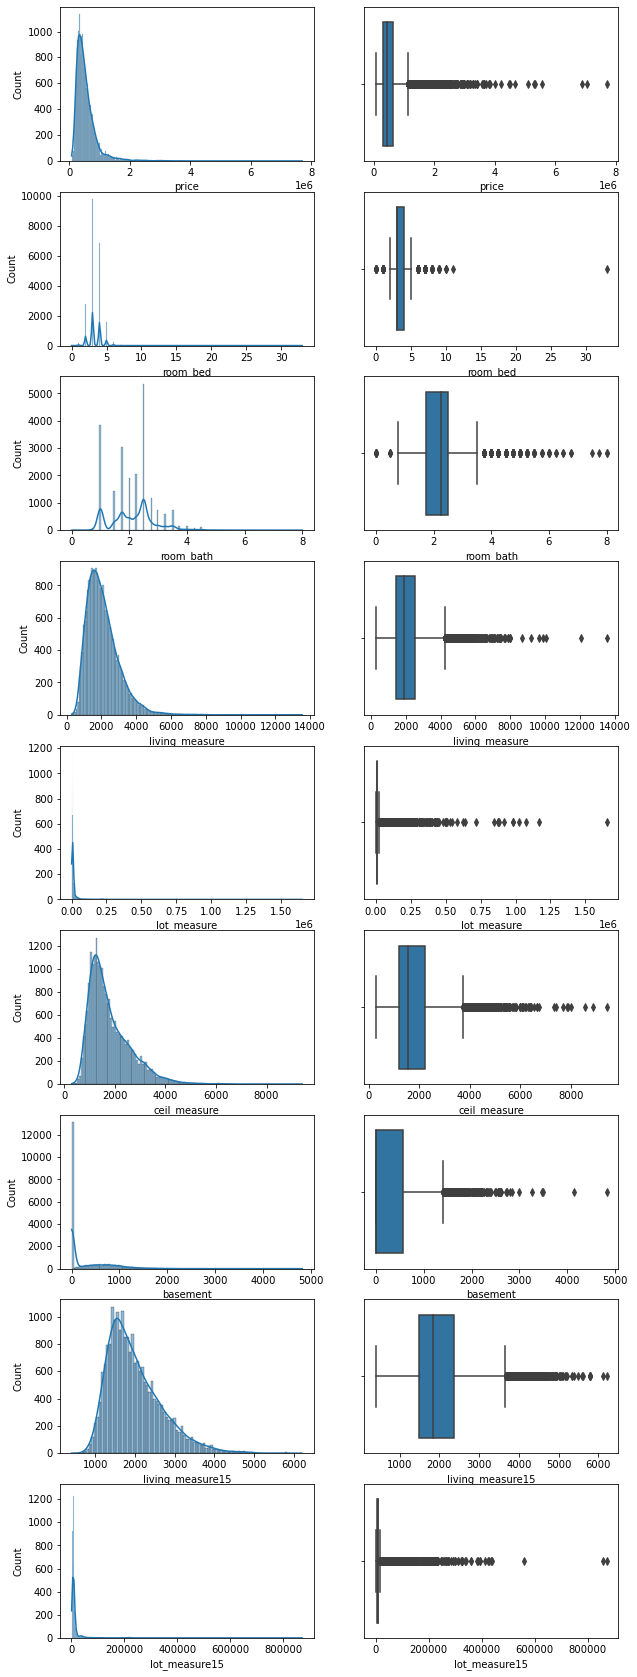

In [14]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(10,30)
sns.histplot(df['price'], kde=True, ax=axes[0][0])
sns.boxplot(x='price', data=df, ax=axes[0][1])
sns.histplot(df['room_bed'] , kde=True, ax=axes[1][0])
sns.boxplot(x='room_bed', data=df , ax=axes[1][1])
sns.histplot(df['room_bath'] , kde=True, ax=axes[2][0])
sns.boxplot(x='room_bath', data=df , ax=axes[2][1])
sns.histplot(df['living_measure'] , kde=True, ax=axes[3][0])
sns.boxplot(x='living_measure', data=df , ax=axes[3][1])
sns.histplot(df['lot_measure'] , kde=True, ax=axes[4][0])
sns.boxplot(x='lot_measure', data=df , ax=axes[4][1])
sns.histplot(df['ceil_measure'] , kde=True, ax=axes[5][0])
sns.boxplot(x='ceil_measure', data=df , ax=axes[5][1])
sns.histplot(df['basement'] , kde=True, ax=axes[6][0])
sns.boxplot(x='basement', data=df , ax=axes[6][1])
sns.histplot(df['living_measure15'] , kde=True, ax=axes[7][0])
sns.boxplot(x='living_measure15', data=df , ax=axes[7][1])
sns.histplot(df['lot_measure15'] , kde=True, ax=axes[8][0])
sns.boxplot(x='lot_measure15', data=df , ax=axes[8][1])
plt.show()

#### Insights:
All fields have outliers in the listed numerical variables.
All data have little bit right skewed

#### Categorical Variable

<AxesSubplot:xlabel='ceil', ylabel='count'>

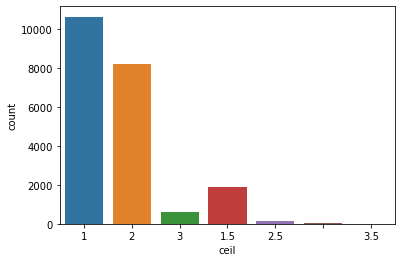

In [15]:
sns.countplot(x='ceil', data=df)

<AxesSubplot:xlabel='coast', ylabel='count'>

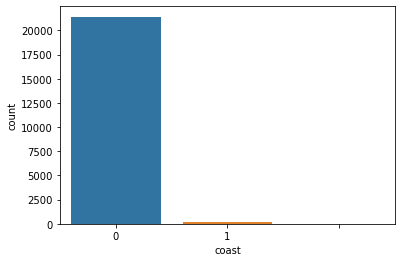

In [16]:
sns.countplot(x='coast', data=df)

<AxesSubplot:xlabel='sight', ylabel='count'>

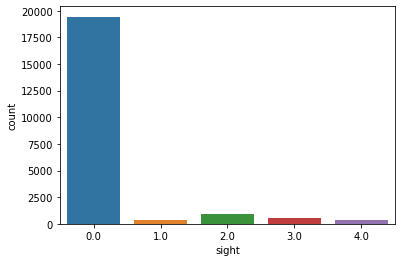

In [17]:
sns.countplot(x='sight', data=df)

<AxesSubplot:xlabel='condition', ylabel='count'>

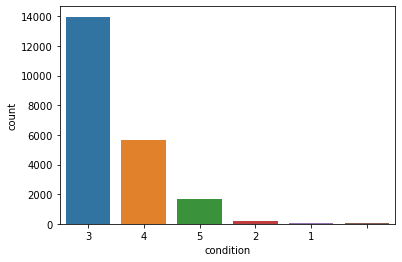

In [18]:
sns.countplot(x='condition', data=df)

<AxesSubplot:xlabel='quality', ylabel='count'>

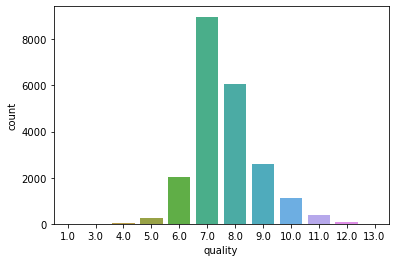

In [19]:
sns.countplot(x='quality', data=df)

<AxesSubplot:xlabel='furnished', ylabel='count'>

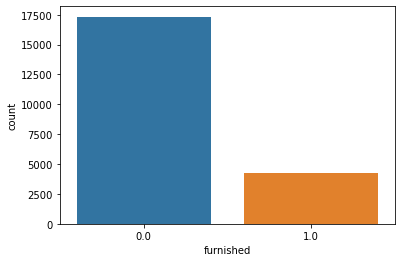

In [20]:
sns.countplot(x='furnished', data=df)

#### Insights:
1. Ceil count '1' have maximum.
2. Coast, sight and furnished count '0' have maximum.
3. Condition count '3' have maximum.
4. Quality count '7' have maximum.

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98039'),
 Text(25, 0, '98040'),
 Text(26, 0, '98042'),
 Text(27, 0, '98045'),
 Text(28, 0, '98052'),
 Text(29, 0, '98053'),
 Text(30, 0, '98055'),
 Text(31, 0, '98056'),
 Text(32, 0, '98058'),
 Text(33, 0, '98059'),
 Text(34, 0, '98065'),
 Text(35, 0, '98070'),
 Text(36, 0, '98072'),
 Text(37, 0, '98074'),
 Text(38, 0, '98075'),
 Text(39, 0, '98077'),
 Text(40, 0, '98092'),
 Text(41, 0, '98102'),
 Text(42, 0, '98103'),
 Text(43, 0, '98105')

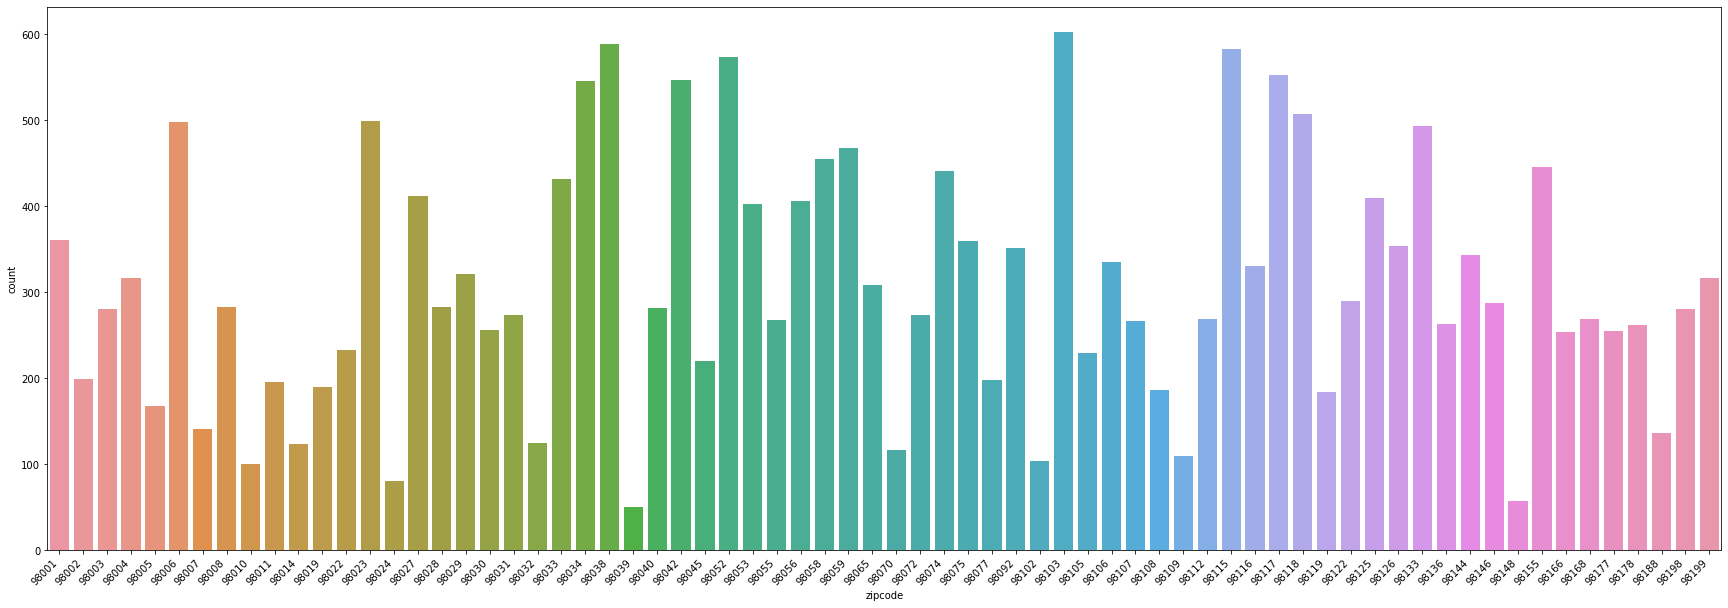

In [132]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x="zipcode", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

### Bivariate Analysis

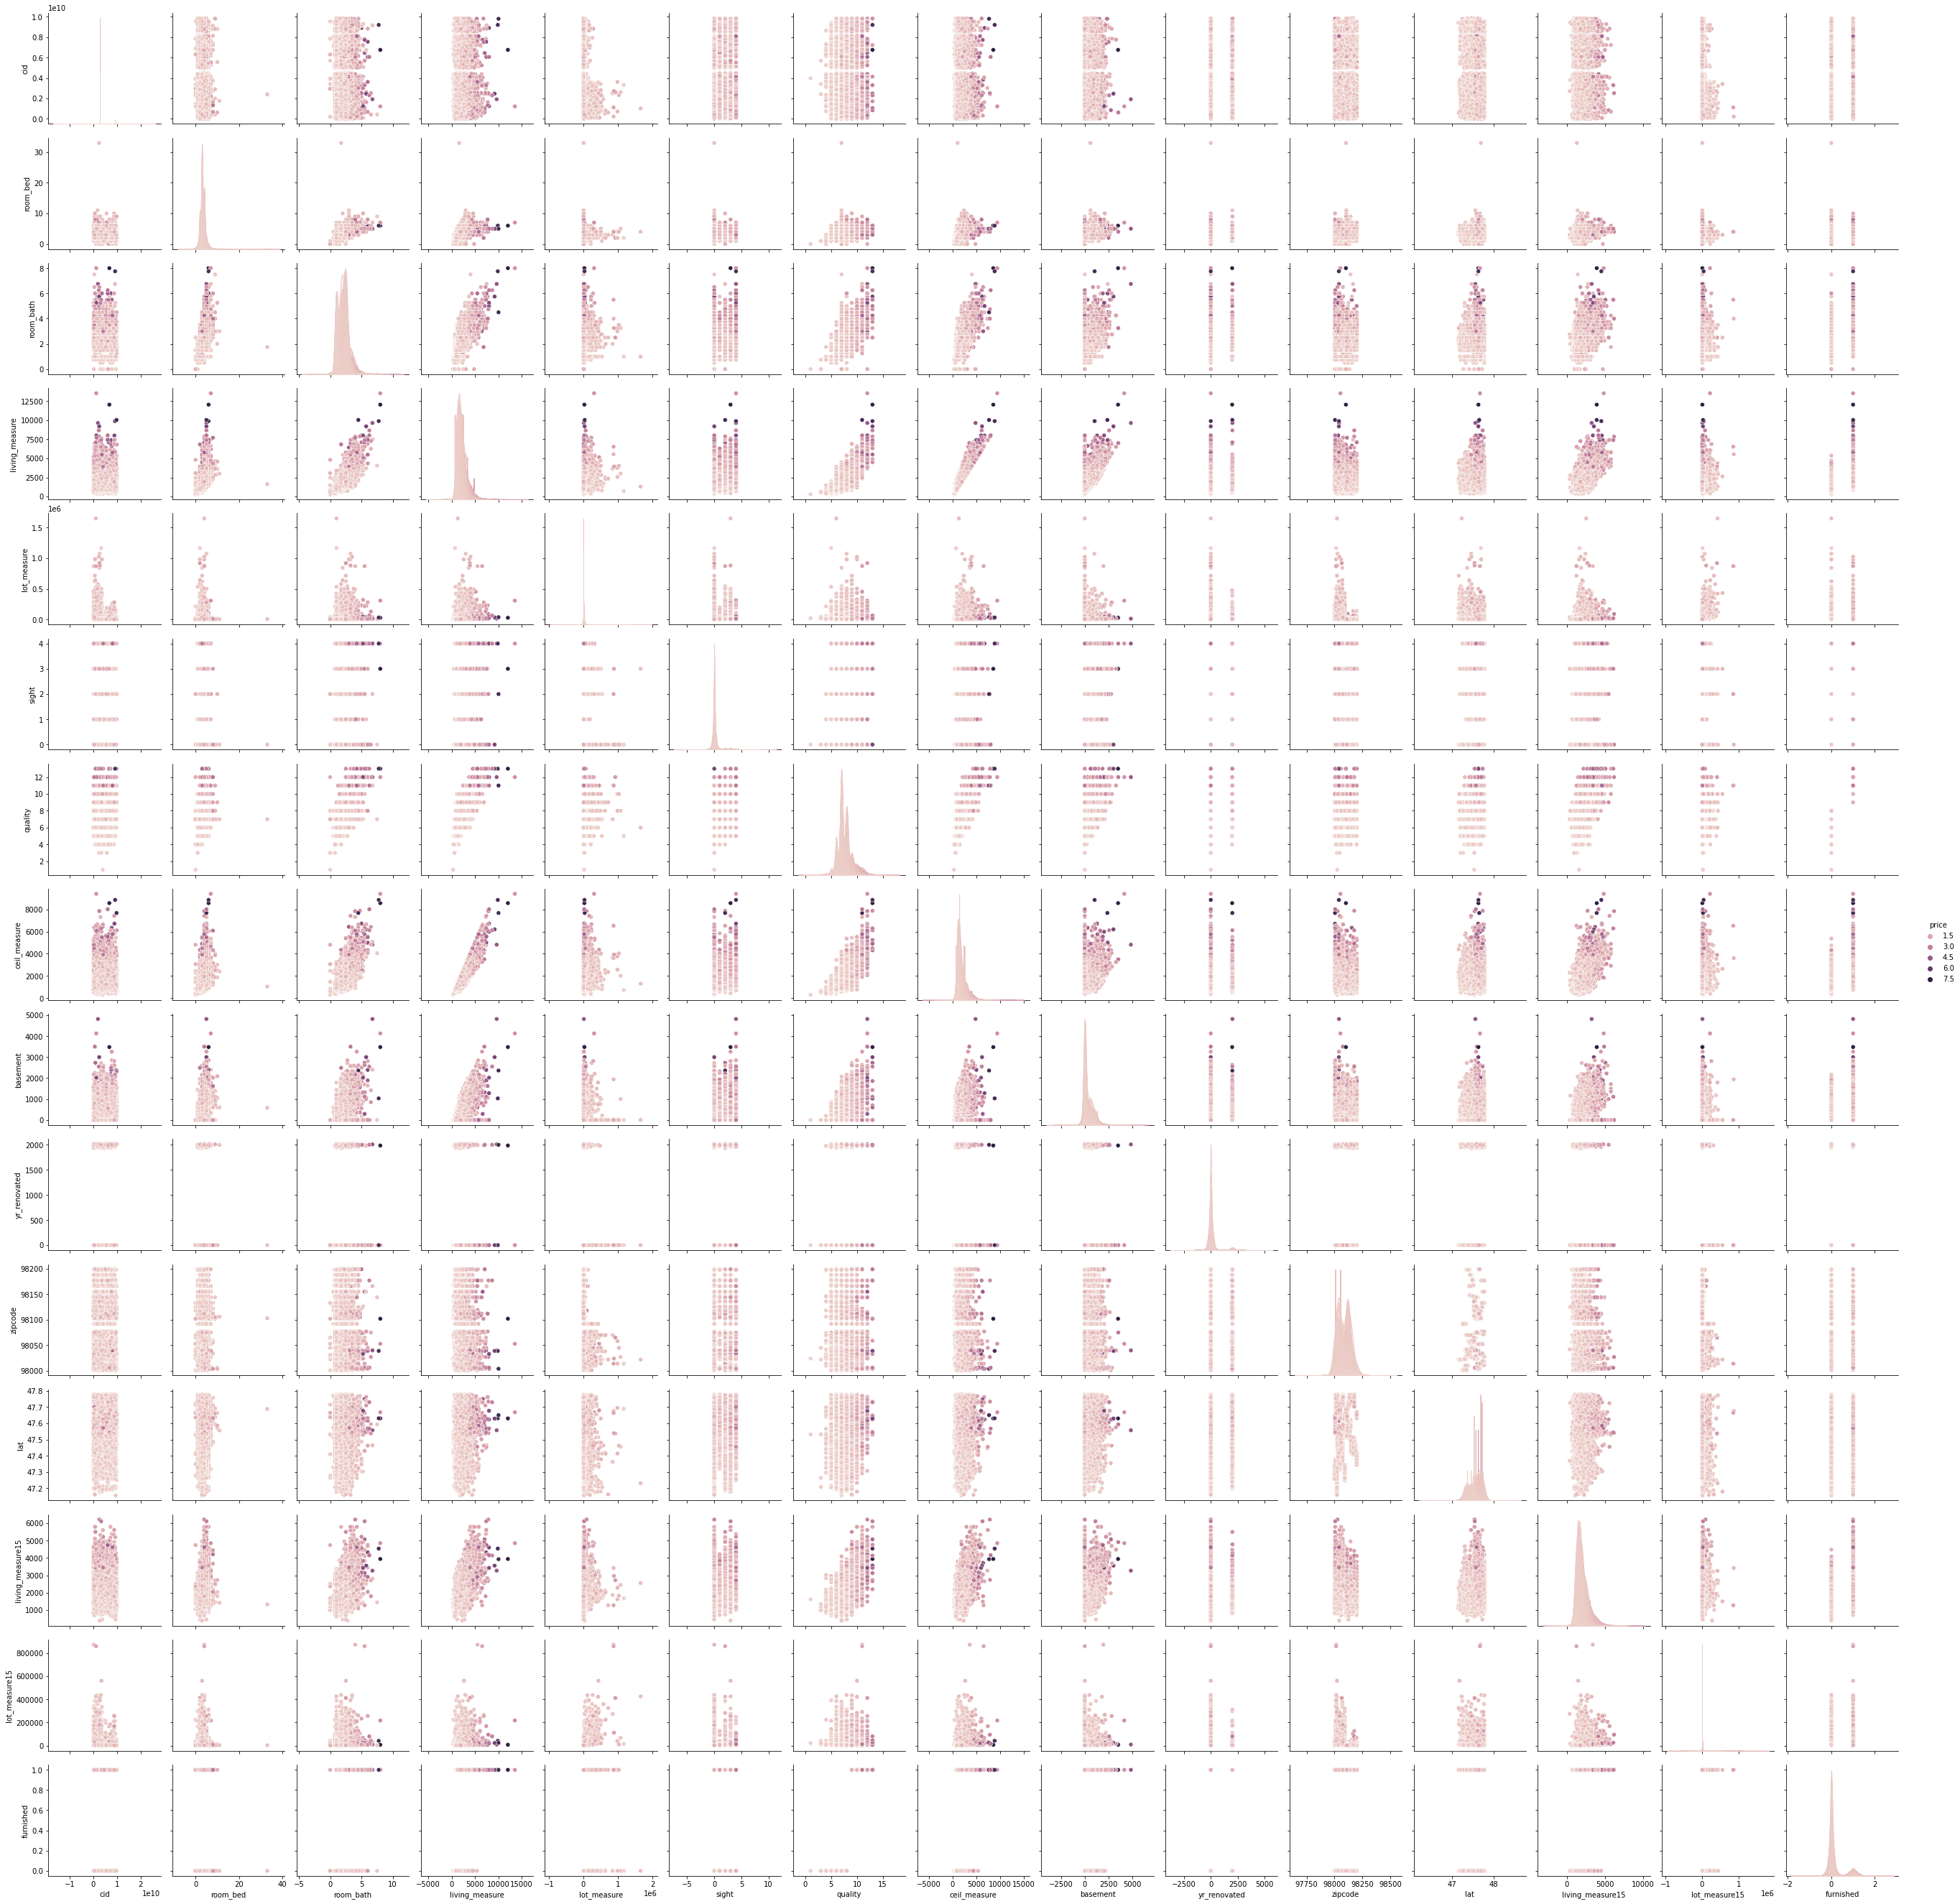

In [21]:
sns.pairplot(df, hue='price')
plt.show()

#### Inference:
As per scatter plot in Bivariate analysis, Price with each other variables scatter with distances.

### Multivariate Analysis

In [22]:
df.corr()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
cid,1.000000,-0.016797,0.001774,0.005660,-0.012130,-0.132043,0.012056,0.008140,-0.010821,-0.005174,-0.016907,-0.008224,-0.001891,-0.002860,-0.138750,-0.010013
price,-0.016797,1.000000,0.308040,0.525179,0.702149,0.089733,0.397522,0.667477,0.605593,0.323825,0.126442,-0.053168,0.306919,0.585186,0.082603,0.566040
room_bed,0.001774,0.308040,1.000000,0.515778,0.576447,0.032051,0.078367,0.356740,0.477708,0.302569,0.018843,-0.152805,-0.009125,0.390823,0.029484,0.259316
room_bath,0.005660,0.525179,0.515778,1.000000,0.754617,0.088055,0.186939,0.665037,0.685556,0.283389,0.050194,-0.204149,0.024505,0.568001,0.087096,0.485162
living_measure,-0.012130,0.702149,0.576447,0.754617,1.000000,0.172958,0.284927,0.762723,0.876653,0.435035,0.055253,-0.199646,0.052764,0.756188,0.183548,0.633157
lot_measure,-0.132043,0.089733,0.032051,0.088055,0.172958,1.000000,0.075144,0.113869,0.183656,0.015400,0.007782,-0.129423,-0.086142,0.145653,0.717727,0.119326
sight,0.012056,0.397522,0.078367,0.186939,0.284927,0.075144,1.000000,0.251095,0.167572,0.277769,0.103078,0.084666,0.006160,0.280976,0.073020,0.219995
quality,0.008140,0.667477,0.356740,0.665037,0.762723,0.113869,0.251095,1.000000,0.755923,0.168403,0.014417,-0.184854,0.114103,0.713114,0.119360,0.788717
ceil_measure,-0.010821,0.605593,0.477708,0.685556,0.876653,0.183656,0.167572,0.755923,1.000000,-0.051925,0.023291,-0.261171,-0.000784,0.731558,0.194246,0.652616
basement,-0.005174,0.323825,0.302569,0.283389,0.435035,0.015400,0.277769,0.168403,-0.051925,1.000000,0.071317,0.074820,0.110508,0.200068,0.017539,0.092624


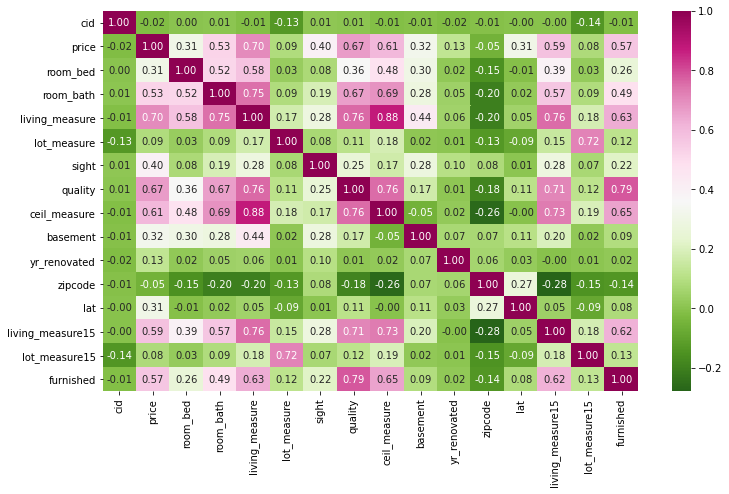

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap= 'PiYG_r')
plt.show()

#### Inference: 
As per the heat map, multi collinearity not present in the dataset.

#### a) Removal of unwanted variables (if applicable)

As per the analysis, few houses mentioned with 0 bedrooms or 0 bathrooms. We can consider as this is a non balance data. Also, for few houses mentioned with living area is larger compared with lot area. In this case we can handle with delete any of one and treat it as a missing value and do missing value imputation.

Also, we have already remove $ symbol present in the dataset.

In [24]:
df.drop(df.index[df['room_bed'] == 0], inplace=True)

In [25]:
df.drop(df.index[df['room_bath'] == 0], inplace=True)

In [26]:
df.shape

(21597, 23)

In [27]:
df.loc[df['lot_measure'] < df['living_measure'], 'lot_measure'] = np.nan

In [28]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,NaN,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


We can remove the columns that are not need in house value prediction.

In [29]:
df = df.drop(columns = 'cid')

In [30]:
df = df.drop(columns = 'dayhours')

#### b) Missing Value treatment (if applicable)

In [31]:
df.isnull().sum().sum()

1476

In [32]:
df.isnull().sum(axis = 1)

0        0
1        0
2        1
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Length: 21597, dtype: int64

We can Dropping columns with more than 30% missing values

In [33]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

lot_measure         0.038385
living_measure15    0.007686
room_bed            0.005001
room_bath           0.005001
condition           0.002639
sight               0.002639
ceil                0.001945
total_area          0.001343
lot_measure15       0.001343
furnished           0.001343
living_measure      0.000787
coast               0.000046
ceil_measure        0.000046
quality             0.000046
basement            0.000046
yr_built            0.000046
yr_renovated        0.000000
zipcode             0.000000
lat                 0.000000
long                0.000000
price               0.000000
dtype: float64

Here there is no columns have missing values more than 30%. So, we can keep all columns.

Imputing the remaining missing values

In [34]:
from sklearn.impute import KNNImputer

In [35]:
imputer = KNNImputer(n_neighbors=10)

In [36]:
df[['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']] = df[['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']].apply(pd.to_numeric)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  int64  
 1   room_bed          21489 non-null  float64
 2   room_bath         21489 non-null  float64
 3   living_measure    21580 non-null  float64
 4   lot_measure       20768 non-null  float64
 5   ceil              21525 non-null  float64
 6   coast             21566 non-null  float64
 7   sight             21540 non-null  float64
 8   condition         21512 non-null  float64
 9   quality           21596 non-null  float64
 10  ceil_measure      21596 non-null  float64
 11  basement          21596 non-null  float64
 12  yr_built          21582 non-null  float64
 13  yr_renovated      21597 non-null  int64  
 14  zipcode           21597 non-null  int64  
 15  lat               21597 non-null  float64
 16  long              21563 non-null  float6

In [38]:
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [39]:
df_imputed.isnull().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [40]:
df_imputed.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,...,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,...,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,735000.0,4.0,2.75,3040.0,3653.0,2.0,1.0,4.0,3.0,8.0,...,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,...,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,...,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


#### d) Outlier treatment

Let's check the number of outliers per column

In [41]:
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [42]:
((df_imputed > UL) | (df_imputed < LL)).sum()

price               1158
room_bed             526
room_bath            559
living_measure       571
lot_measure         2425
ceil                   0
coast                163
sight               2145
condition             29
quality             1905
ceil_measure         610
basement             496
yr_built               0
yr_renovated         914
zipcode                0
lat                    2
long                 255
living_measure15     541
lot_measure15       2186
furnished           4262
total_area          2412
dtype: int64

There are more columns have outliers. provided information are real time values. There is no need to treat outlier treatment.

### 1. Model building and interpretation.

In [43]:
df1=df_imputed.copy()

In [44]:
# Split the data into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split

In [45]:
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Train/ Test split for scaled data
Extracting the target column into separate vectors for training set and test set

In [46]:
x = df1.drop('price', axis=1)
y = df1[['price']]

#### Splitting data into training and test set

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

Checking the dimensions of the training and test data

In [48]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (15117, 20)
x_test (6480, 20)
y_train (15117, 1)
y_test (6480, 1)


### Linear Regression Model

In [49]:
#Create the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [50]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for room_bed is -39224.61449805533
The coefficient for room_bath is 48198.809868376266
The coefficient for living_measure is 136.32644599913328
The coefficient for lot_measure is 2.540348307338718
The coefficient for ceil is 5767.34436147553
The coefficient for coast is 588747.2756821638
The coefficient for sight is 55410.31811042539
The coefficient for condition is 28821.27659575731
The coefficient for quality is 84029.71827692327
The coefficient for ceil_measure is 48.95199825490363
The coefficient for basement is 18.129544614096176
The coefficient for yr_built is -2584.4458071464974
The coefficient for yr_renovated is 13.323496800751784
The coefficient for zipcode is -603.6349992668543
The coefficient for lat is 613554.1489833964
The coefficient for long is -219334.85854989855
The coefficient for living_measure15 is 20.86784492658353
The coefficient for lot_measure15 is -0.3817342674883548
The coefficient for furnished is 37734.88226412475
The coefficient for total_a

In [51]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7693981.01984792


In [52]:
# R square on training data
regression_model.score(x_train, y_train)

0.7041147757674935

In [133]:
#display adjusted R-squared
1 - (1-regression_model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.7037227709659135

#### 70% of the variation in the price is explained by the predictors in the model for train set

In [53]:
# R square on testing data
regression_model.score(x_test, y_test)

0.6930799545733626

In [134]:
#display adjusted R-squared
1 - (1-regression_model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6921295905992904

In [54]:
# RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

201273.21325604967

In [55]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

200033.66604751706

In [56]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [57]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE1= MAPE(y_train,predicted_train)
print("MAPE: ",LR_MAPE1)

MAPE:  price    25.4014
dtype: float64


In [58]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE2= MAPE(y_test,predicted_test)
print("MAPE: ",LR_MAPE2)

MAPE:  price    25.333014
dtype: float64


## Ridge model

In [59]:
## Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-3.92364902e+04  4.81977744e+04  1.36491962e+02  2.54109006e+00
   5.79509933e+03  5.86997133e+05  5.54851548e+04  2.88107310e+04
   8.40654960e+04  4.87786030e+01  1.79940357e+01 -2.58577392e+03
   1.33302545e+01 -6.02725796e+02  6.12776287e+05 -2.18882474e+05
   2.08557356e+01 -3.81912608e-01  3.77040915e+04 -2.40831369e+00]]


In [60]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.7041145443277228
0.6930845628864687


In [135]:
#display adjusted R-squared
1 - (1-ridge.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.703722539219519

In [136]:
#display adjusted R-squared
1 - (1-ridge.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6921342131818286

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
predR1 = ridge.predict(x_train)
rmser1 = np.sqrt(mean_squared_error(y_train,predR1))
rmser1

201273.29197342618

In [63]:
predR2 = ridge.predict(x_test)
rmser2 = np.sqrt(mean_squared_error(y_test,predR2))
rmser2

200032.16431890908

In [64]:
# Using MAPE error metrics to check for the error rate and accuracy level
R_MAPE1= MAPE(y_train,predR1)
print("MAPE: ",R_MAPE1)
# Using MAPE error metrics to check for the error rate and accuracy level
R_MAPE2= MAPE(y_test,predR2)
print("MAPE: ",R_MAPE2)

MAPE:  price    25.398152
dtype: float64
MAPE:  price    25.32941
dtype: float64


## Lasso model

In [65]:
## Create a regularized LASSO model and note the coefficients
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-3.92377366e+04  4.81689198e+04  2.74696081e+02  1.47566145e+00
  6.05459136e+03  5.88733096e+05  5.54181535e+04  2.88077283e+04
  8.40691057e+04 -9.06031700e+01 -1.21179195e+02 -2.58218434e+03
  1.33468623e+01 -6.03274548e+02  6.13482055e+05 -2.19538608e+05
  2.08110292e+01 -3.86657022e-01  3.78124627e+04 -1.34161661e+00]


In [66]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.704088367918748
0.6931354873926324


In [137]:
#display adjusted R-squared
1 - (1-lasso.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.703696328130617

In [138]:
#display adjusted R-squared
1 - (1-lasso.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6921852953734116

In [67]:
predL1 = lasso.predict(x_train)
rmsel1 = np.sqrt(mean_squared_error(y_train,predL1))
rmsel1

201282.19490424724

In [68]:
predL2 = lasso.predict(x_test)
rmsel2 = np.sqrt(mean_squared_error(y_test,predL2))
rmsel2

200015.56860469148

In [69]:
predL1a=predL1.reshape(15117,1)

In [70]:
predL2a=predL2.reshape(6480,1)

In [71]:
# Using MAPE error metrics to check for the error rate and accuracy level
LMAPE1= MAPE(y_train,predL1a)
print("MAPE: ",LMAPE1)
# Using MAPE error metrics to check for the error rate and accuracy level
LMAPE2= MAPE(y_test,predL2a)
print("MAPE: ",LMAPE2)

MAPE:  price    25.404485
dtype: float64
MAPE:  price    25.329567
dtype: float64


### Building a Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestRegressor
RF1=RandomForestRegressor()
RF1.fit(x_train, y_train)

RF1_predtr= RF1.predict(x_train)
RF1_predtt= RF1.predict(x_test)

#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, RF1_predtr)

RF1_ttscore=r2_score(y_test,RF1_predtt)
RF1_testRMSE=np.sqrt(mean_squared_error(y_test, RF1_predtt))
RF1_testMSE=mean_squared_error(y_test, RF1_predtt)
RF1_testMAE=mean_absolute_error(y_test, RF1_predtt)


In [73]:
print(RF1_trscore, RF1_trRMSE, RF1_trMAE)

0.980733407853959 51360.21024947105 26403.758208555802


In [74]:
print(RF1_ttscore, RF1_testRMSE, RF1_testMAE)

0.883919915803707 123018.18769912868 69228.36477358906


In [139]:
#display adjusted R-squared
1 - (1-RF1.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.9807078824271624

In [140]:
#display adjusted R-squared
1 - (1-RF1.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8835604790977268

In [75]:
RF1_predtra=RF1_predtr.reshape(15117,1)

In [76]:
RF1_predtta=RF1_predtt.reshape(6480,1)

In [77]:
# Using MAPE error metrics to check for the error rate and accuracy level
RFMAPE1= MAPE(y_train,RF1_predtra)
print("MAPE: ",RFMAPE1)
# Using MAPE error metrics to check for the error rate and accuracy level
RFMAPE2= MAPE(y_test,RF1_predtta)
print("MAPE: ",RFMAPE2)

MAPE:  price    4.99105
dtype: float64
MAPE:  price    12.851536
dtype: float64


### KNN model

In [78]:
knn= KNeighborsClassifier()

In [79]:
knn.fit(x_train, y_train)

#predicting result over test data
knn_predtr= knn.predict(x_train)
knn_predtt= knn.predict(x_test)

In [80]:
knn_predtra=knn_predtr.reshape(15117,1)

In [81]:
knn_predtta=knn_predtt.reshape(6480,1)

In [82]:
#Model score and Deduction for each Model in a DataFrame
knn_trscore=r2_score(y_train,knn_predtr)
knn_trRMSE=np.sqrt(mean_squared_error(y_train, knn_predtr))
knn_trMSE=mean_squared_error(y_train, knn_predtr)
knn_trMAPE=MAPE(y_train, knn_predtra)

knn_ttscore=r2_score(y_test,knn_predtt)
knn_ttRMSE=np.sqrt(mean_squared_error(y_test, knn_predtt))
knn_ttMSE=mean_squared_error(y_test, knn_predtt)
knn_ttMAPE=MAPE(y_test, knn_predtta)

In [83]:
print(knn_trscore, knn_trRMSE, knn_trMAPE)

0.13002894920477115 345125.25582874793 price    28.684801
dtype: float64


In [84]:
print(knn_ttscore, knn_ttRMSE, knn_ttMAPE)

0.05168603988811016 351614.3081747594 price    34.607288
dtype: float64


In [141]:
#display adjusted R-squared
1 - (1-knn.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.19772133129125058

In [142]:
#display adjusted R-squared
1 - (1-knn.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.0012379128367155934

# 2. Model Tuning

### Linear Regression Model tuning

## Linear Regression using statsmodels

In [85]:
# concatenate x and y into a single dataframe
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test, y_test],axis=1)
data_train.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,price
8093,5.0,2.75,3831.0,13800.0,2.0,1.0,4.0,3.0,9.0,3831.0,...,1959.0,1980.0,98040.0,47.5919,-122.251,3850.0,36563.0,1.0,17631.0,2700000.0
13884,3.0,1.50,1540.0,11858.0,1.0,0.0,0.0,4.0,7.0,1540.0,...,1966.0,0.0,98059.0,47.4755,-122.157,1550.0,11473.0,0.0,13398.0,357500.0
406,5.0,2.50,1940.0,9389.0,1.0,0.0,0.0,4.0,7.0,1290.0,...,1960.0,0.0,98155.0,47.7438,-122.328,1810.0,9390.0,0.0,11329.0,299000.0
21317,3.0,1.75,2700.0,18893.0,1.0,0.0,0.0,4.0,7.0,2110.0,...,1948.0,1983.0,98010.0,47.3397,-122.048,2260.0,17494.0,0.0,21593.0,625000.0
7766,1.0,1.00,1940.0,6300.0,1.0,0.0,3.0,3.0,8.0,1940.0,...,1963.0,0.0,98116.0,47.5782,-122.400,2560.0,6300.0,0.0,8240.0,611206.0


In [86]:
data_train.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'price'],
      dtype='object')

In [87]:
expr_scale= 'price ~ room_bed + room_bath + living_measure + lot_measure + ceil + coast + sight + condition + quality + ceil_measure + basement + yr_built + yr_renovated + zipcode + lat + long + living_measure15 + lot_measure15 + furnished + total_area'

In [88]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr_scale, data = data_train).fit()
lm1.params

Intercept           7.693981e+06
room_bed           -3.922461e+04
room_bath           4.819881e+04
living_measure      1.363264e+02
lot_measure         2.540348e+00
ceil                5.767344e+03
coast               5.887473e+05
sight               5.541032e+04
condition           2.882128e+04
quality             8.402972e+04
ceil_measure        4.895200e+01
basement            1.812954e+01
yr_built           -2.584446e+03
yr_renovated        1.332350e+01
zipcode            -6.036350e+02
lat                 6.135541e+05
long               -2.193349e+05
living_measure15    2.086784e+01
lot_measure15      -3.817343e-01
furnished           3.773488e+04
total_area         -2.407241e+00
dtype: float64

In [89]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1796.
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        10:48:23   Log-Likelihood:            -2.0607e+05
No. Observations:               15117   AIC:                         4.122e+05
Df Residuals:                   15096   BIC:                         4.123e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.694e+06   3.51e+06  

In [90]:
np.sqrt(lm1.mse_resid)

201413.1598826226

In [91]:
## Test data

In [92]:
import statsmodels.formula.api as smf
lm1t = smf.ols(formula= expr_scale, data = data_test).fit()
lm1t.params

Intercept           6.445987e+06
room_bed           -2.661922e+04
room_bath           3.380069e+04
living_measure      1.366942e+02
lot_measure         1.109332e+00
ceil                7.331726e+03
coast               5.947982e+05
sight               4.584123e+04
condition           2.312156e+04
quality             9.321088e+04
ceil_measure        3.001599e+01
basement            7.749258e+00
yr_built           -2.630950e+03
yr_renovated        3.778216e+01
zipcode            -5.669475e+02
lat                 5.788864e+05
long               -2.141198e+05
living_measure15    1.988260e+01
lot_measure15      -4.535967e-01
furnished           4.537563e+04
total_area         -9.845714e-01
dtype: float64

In [93]:
print(lm1t.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     740.0
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        10:48:23   Log-Likelihood:                -88258.
No. Observations:                6480   AIC:                         1.766e+05
Df Residuals:                    6459   BIC:                         1.767e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.446e+06   5.32e+06  

In [94]:
np.sqrt(lm1t.mse_resid)

199343.5191455689

### Lasso model tuning

In [95]:
from sklearn.model_selection import RepeatedKFold
from numpy import arange
# define model
modell = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(modell, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
resultsltr = search.fit(x_train, y_train)

In [96]:
print('MAE: %.3f' % resultsltr.best_score_)
print('Config: %s' % resultsltr.best_params_)

MAE: -125967.490
Config: {'alpha': 0.99}


In [97]:
print(resultsltr.score(x_test, y_test))

-126776.17085581455


In [98]:
predLt1 = resultsltr.predict(x_train)
rmselt1 = np.sqrt(mean_squared_error(y_train,predLt1))
rmselt1

201282.1940286928

In [99]:
predLt2 = resultsltr.predict(x_test)
rmselt2 = np.sqrt(mean_squared_error(y_test,predLt2))
rmselt2

200015.325162656

In [147]:
#display adjusted R-squared
1 - (1-resultsltr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

-125845.0269226919

In [145]:
#display adjusted R-squared
1 - (1-resultsltr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-127168.73060455525

In [100]:
predLt1a=predLt1.reshape(15117,1)

In [101]:
predLt2a=predLt2.reshape(6480,1)

In [102]:
# Using MAPE error metrics to check for the error rate and accuracy level
LtMAPE1= MAPE(y_train,predLt1a)
print("MAPE: ",LtMAPE1)
# Using MAPE error metrics to check for the error rate and accuracy level
LtMAPE2= MAPE(y_test,predLt2a)
print("MAPE: ",LtMAPE2)

MAPE:  price    25.404086
dtype: float64
MAPE:  price    25.329164
dtype: float64


### Ridge model tuning

In [103]:
from sklearn.model_selection import RepeatedKFold
from numpy import arange
# define model
modelr = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search1 = GridSearchCV(modelr, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
resultsltrr = search1.fit(x_train, y_train)

In [104]:
print('MAE: %.3f' % resultsltrr.best_score_)
print('Config: %s' % resultsltrr.best_params_)

MAE: -126039.450
Config: {'alpha': 0.99}


In [105]:
print(resultsltrr.score(x_train, y_train))
print(resultsltrr.score(x_test, y_test))

-125644.98120879059
-126762.3344289457


In [148]:
#display adjusted R-squared
1 - (1-resultsltrr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

-125811.44382300468

In [149]:
#display adjusted R-squared
1 - (1-resultsltrr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-127154.85133381936

In [106]:
predRt1 = resultsltrr.predict(x_train)
rmsert1 = np.sqrt(mean_squared_error(y_train,predRt1))
rmsert1

201274.06101368376

In [107]:
predRt2 = resultsltrr.predict(x_test)
rmsert2 = np.sqrt(mean_squared_error(y_test,predRt2))
rmsert2

200029.224174503

In [108]:
predRt1a=predRt1.reshape(15117,1)

In [109]:
predRt2a=predRt2.reshape(6480,1)

In [110]:
# Using MAPE error metrics to check for the error rate and accuracy level
RtMAPE1= MAPE(y_train,predRt1a)
print("MAPE: ",RtMAPE1)
# Using MAPE error metrics to check for the error rate and accuracy level
RtMAPE2= MAPE(y_test,predRt2a)
print("MAPE: ",RtMAPE2)

MAPE:  price    25.390803
dtype: float64
MAPE:  price    25.321271
dtype: float64


### Random Forest model tuning

In [111]:
from sklearn.ensemble import RandomForestRegressor
RFt = RandomForestRegressor(random_state=0)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}
grid_search = GridSearchCV(estimator = RFt, param_grid = param_grid, cv = 10)
grid_search.fit(x_train,y_train) 

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [112]:
best_grid = grid_search.best_params_
best_grid

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}

In [113]:
rf_best = RandomForestRegressor(max_depth= 10, max_features= 6,n_estimators=300,min_samples_leaf=5,min_samples_split=50,
                                random_state=14)

In [114]:
resultsltrrf = rf_best.fit(x_train, y_train)

In [115]:
print(resultsltrrf.score(x_train, y_train))
print(resultsltrrf.score(x_test, y_test))

0.8601790293312619
0.8324749125049351


In [150]:
#display adjusted R-squared
1 - (1-resultsltrrf.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.8599937869217908

In [151]:
#display adjusted R-squared
1 - (1-resultsltrrf.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8319561786839255

In [116]:
predRft1 = resultsltrrf.predict(x_train)
rmserft1 = np.sqrt(mean_squared_error(y_train,predRft1))
rmserft1

138359.9821568789

In [117]:
predRft2 = resultsltrrf.predict(x_test)
rmserft2 = np.sqrt(mean_squared_error(y_test,predRft2))
rmserft2

147785.01302945925

In [118]:
predRft1a=predRft1.reshape(15117,1)

In [119]:
predRft2a=predRft2.reshape(6480,1)

In [120]:
# Using MAPE error metrics to check for the error rate and accuracy level
RftMAPE1= MAPE(y_train,predRft1a)
print("MAPE: ",RftMAPE1)
# Using MAPE error metrics to check for the error rate and accuracy level
RftMAPE2= MAPE(y_test,predRft2a)
print("MAPE: ",RftMAPE2)

MAPE:  price    14.222842
dtype: float64
MAPE:  price    15.069557
dtype: float64


### KNN model tuning

Grid Search for finding out the optimal values for the hyper parameters

In [121]:
from sklearn.neighbors import KNeighborsClassifier
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,50,2):
    knnt = KNeighborsClassifier(n_neighbors=k)
    knnt.fit(x_train, y_train)
    # evaluate accuracy
    scores = knnt.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.9921296296296296,
 0.9947530864197531,
 0.995679012345679,
 0.9964506172839506,
 0.9967592592592592,
 0.996141975308642,
 0.9958333333333333,
 0.9942901234567901,
 0.9942901234567901,
 0.9942901234567901,
 0.9942901234567901,
 0.9939814814814815,
 0.9930555555555556,
 0.9924382716049382,
 0.9924382716049382,
 0.991358024691358,
 0.9915123456790124,
 0.9924382716049382,
 0.9925925925925926,
 0.9929012345679012,
 0.9924382716049382,
 0.9924382716049382,
 0.991820987654321,
 0.9915123456790124,
 0.9915123456790124]

In [122]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [123]:
knn_best = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [124]:
resultsltrk = knn_best.fit(x_train, y_train)

In [125]:
print(resultsltrk.score(x_train, y_train))
print(resultsltrk.score(x_test, y_test))

0.9944433419329232
0.008487654320987654


In [152]:
#display adjusted R-squared
1 - (1-resultsltrk.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.9944359801707782

In [153]:
#display adjusted R-squared
1 - (1-resultsltrk.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.005417481397380186

In [126]:
predkt1 = resultsltrk.predict(x_train)
rmsekt1 = np.sqrt(mean_squared_error(y_train,predkt1))
rmsekt1

13593.050729253817

In [127]:
predkt2 = resultsltrk.predict(x_test)
rmsekt2 = np.sqrt(mean_squared_error(y_test,predkt2))
rmsekt2

305833.8100460408

In [128]:
predkt1a=predkt1.reshape(15117,1)

In [129]:
predkt2a=predkt2.reshape(6480,1)

In [130]:
# Using MAPE error metrics to check for the error rate and accuracy level
ktMAPE1= MAPE(y_train,predkt1a)
print("MAPE: ",ktMAPE1)
# Using MAPE error metrics to check for the error rate and accuracy level
ktMAPE2= MAPE(y_test,predkt2a            )
print("MAPE: ",ktMAPE2)

MAPE:  price    0.257634
dtype: float64
MAPE:  price    36.303142
dtype: float64


### Variable importance for Random forest

Feature: 0, Score: 0.00316
Feature: 1, Score: 0.00778
Feature: 2, Score: 0.30299
Feature: 3, Score: 0.00986
Feature: 4, Score: 0.00228
Feature: 5, Score: 0.03672
Feature: 6, Score: 0.01538
Feature: 7, Score: 0.00272
Feature: 8, Score: 0.17025
Feature: 9, Score: 0.01901
Feature: 10, Score: 0.00515
Feature: 11, Score: 0.02104
Feature: 12, Score: 0.00204
Feature: 13, Score: 0.01224
Feature: 14, Score: 0.16011
Feature: 15, Score: 0.06905
Feature: 16, Score: 0.03385
Feature: 17, Score: 0.01145
Feature: 18, Score: 0.10478
Feature: 19, Score: 0.01013


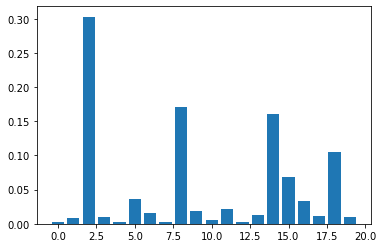

In [131]:
from matplotlib import pyplot
# get importance
importance = RF1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()